In [1]:
import numpy as np
import pandas as pd
from streaming_elastic import StreamingDepth
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv("./data/sample_data2.csv")
print(df.shape)
df.head()

(288, 102)


,bp0_sb0_cpu_0_temp,bp0_sb0_cpu_1_temp,bp0_sb0_cpu_2_temp,bp0_sb0_cpu_3_temp,bp0_sb1_cpu_0_temp,bp0_sb1_cpu_1_temp,bp0_sb1_cpu_2_temp,bp0_sb1_cpu_3_temp,bp0_sb2_cpu_0_temp,bp0_sb2_cpu_1_temp,...,bp1_sb11_cpu_0_temp,bp1_sb11_cpu_1_temp,bp1_sb11_cpu_2_temp,bp1_sb11_cpu_3_temp,iosb0_cpu_temp,iosb1_cpu_temp,iosb2_cpu_temp,iosb3_cpu_temp,iosb4_cpu_temp,iosb5_cpu_temp
0,17.85,18.48,18.80,17.85,17.85,18.48,18.17,17.53,18.17,18.17,...,17.53,18.48,19.12,17.85,16.58,16.26,17.21,16.26,15.3,17.85
1,17.85,18.17,18.48,17.53,17.53,18.48,18.17,17.53,18.17,18.17,...,17.53,18.17,19.12,17.85,16.58,15.94,17.21,16.26,15.3,17.85
2,17.85,18.17,18.48,17.53,17.85,18.48,18.17,17.53,18.17,18.17,...,17.53,18.17,19.12,17.85,16.58,16.26,17.21,16.26,15.3,17.85
3,17.85,18.17,18.80,17.53,17.53,18.48,18.17,17.53,18.17,18.17,...,17.53,18.17,19.12,17.85,16.58,15.94,17.21,16.26,15.3,17.85
4,17.85,18.17,18.80,17.53,17.85,18.48,18.17,17.53,18.17,18.17,...,17.53,18.17,19.12,17.85,16.58,16.26,17.21,16.26,15.3,17.85


In [3]:
def plot_outliers(df, outliers, start=0, n_timepts=None):
    colors = {False: 'gray', True: 'red'}

    if (n_timepts is None):
        n_timepts = df.shape[0] - 1

    cmap_amp = ListedColormap([colors[label] for label in outliers['amp']])
    cmap_phs = ListedColormap([colors[label] for label in outliers['phs']])
    legend_handles = [
        plt.Line2D([0], [0], marker='o', color='w', label='not outlier', markerfacecolor='gray', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='outlier', markerfacecolor='red', markersize=10)
    ]

    df.plot(colormap=cmap_amp, alpha=0.8, lw=0.7, figsize=(7, 5))
    plt.xticks(rotation=45)
    plt.title("Amplitude outliers plot")
    plt.legend(handles=legend_handles)

    if start is not None:
        plt.axvline(x=df.index[start], alpha=0.8, lw=0.7, color='b')
        plt.axvline(x=df.index[n_timepts], alpha=0.8, lw=0.7, color='b')

    df.plot(colormap=cmap_phs, alpha=0.8, lw=0.7, figsize=(7, 5))
    plt.xticks(rotation=45)
    plt.title("Phase outliers plot")
    plt.legend(handles=legend_handles)

    if n_timepts is not None:
        plt.axvline(x=df.index[start], alpha=0.8, lw=0.7, color='b')
        plt.axvline(x=df.index[n_timepts], alpha=0.8, lw=0.7, color='b')

    print('Amplitude outliers:',df.columns[outliers['amp']])
    print('Phase outliers:', df.columns[outliers['phs']])

In [4]:
start = 0
n_timepts = 20

F = df[start:n_timepts].iloc[:,:-1].to_numpy()
time_points = np.linspace(0, 1, F.shape[0])

depths = StreamingDepth(F)
elastic_out = depths.elastic_outliers()

Amplitude outliers: Index(['bp0_sb1_cpu_0_temp', 'bp0_sb1_cpu_2_temp', 'bp0_sb8_cpu_3_temp',
       'bp0_sb10_cpu_0_temp', 'bp0_sb11_cpu_0_temp', 'bp0_sb11_cpu_1_temp',
       'bp0_sb11_cpu_2_temp'],
      dtype='object')
Phase outliers: Index([], dtype='object')


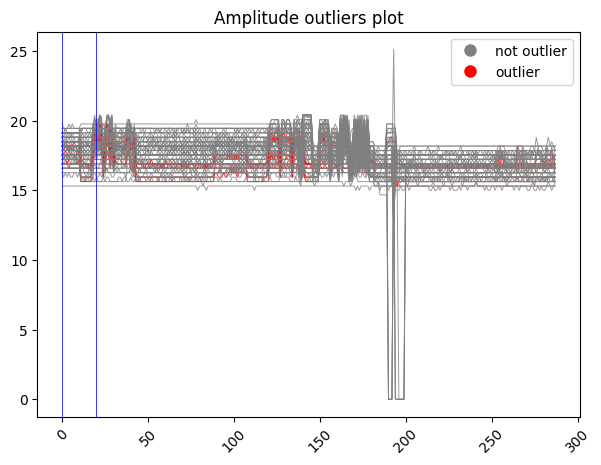

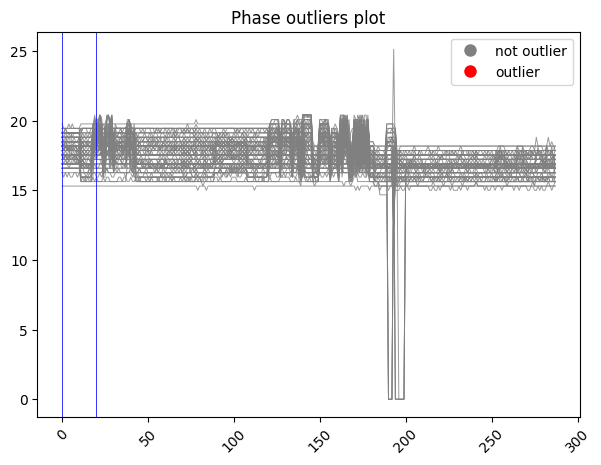

In [5]:
plot_outliers(df.iloc[:,:-1], elastic_out.labels, start, n_timepts)

In [6]:
print(df.iloc[:,:-1].shape)
print('number of labels:',len(elastic_out.labels['amp']))

(288, 101)
number of labels: 101


0      17.85
1      17.85
2      17.85
3      17.85
4      17.85
       ...  
283    17.85
284    17.85
285    17.85
286    17.85
287    17.85
Name: iosb5_cpu_temp, Length: 288, dtype: float64


Text(0.5, 1.0, 'New time series: C_101')

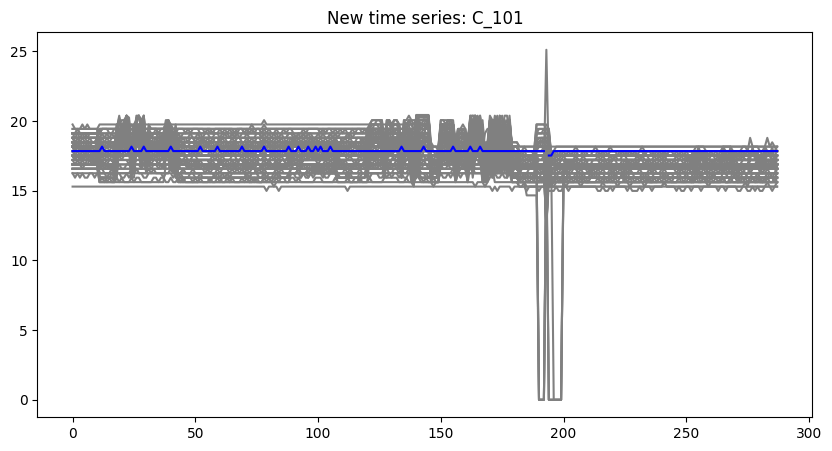

In [7]:
print(df.iloc[:,101]) # new time series we are introducing
F_new = df[start:n_timepts].iloc[:,101].T.to_numpy()
ax = df.iloc[:, :-1].plot(figsize=(10, 5), color='gray', legend=False)
df.iloc[:, 101].plot(ax=ax, color='blue')
plt.title("New time series: C_101")

In [8]:
depths.prog_update(F_new)

In [10]:
print(df.shape)
print('number of labels:',len(depths.labels['amp']))

(288, 102)
number of labels: 102


Amplitude outliers: Index(['bp0_sb1_cpu_0_temp', 'bp0_sb1_cpu_2_temp', 'bp0_sb8_cpu_3_temp',
       'bp0_sb10_cpu_0_temp', 'bp0_sb11_cpu_0_temp', 'bp0_sb11_cpu_1_temp',
       'bp0_sb11_cpu_2_temp'],
      dtype='object')
Phase outliers: Index([], dtype='object')


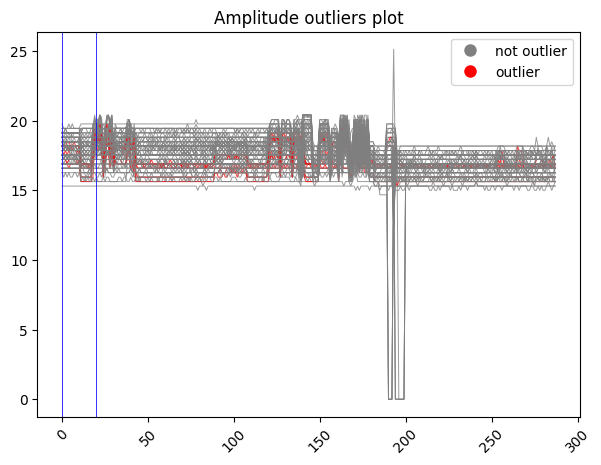

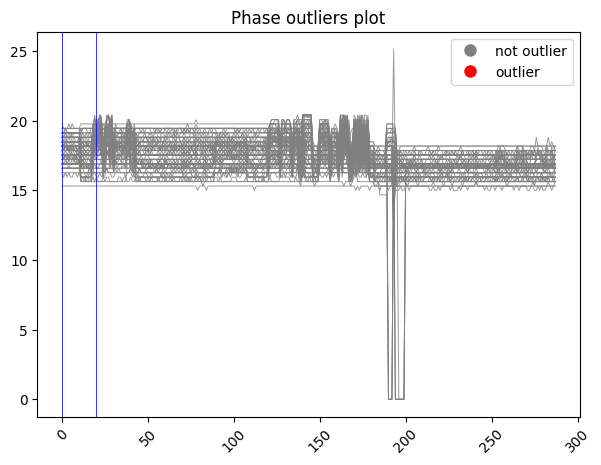

In [11]:
plot_outliers(df, depths.labels, start, n_timepts)